Paweł Błoch <br>
145375 <br>
grupa 3.1  <br>

# Zadanie domowe wersja podstawowa

## Źródło danych


Dane pochodzą z bazy kaggle  [źródło]( https://www.kaggle.com/prashant111/student-alcohol-consumption?select=student_mat.csv). Dane te zostały zebrane podczas przeprowadzonej ankiety wśród uczniów kierunku matematyka w szkole średniej. Tabela składa się z 33 kolumn i 395 wierszy. W każdym wierszu zapisane są odpowiedzi uzyskane od jednego unikalnego ucznia. Znaczenie wszystkich kolumn można znaleźć [tutaj](https://www.kaggle.com/prashant111/student-alcohol-consumption?select=student_mat.csv). Analizie zostałe poddane wybrane kolumny ze zbioru danych. Zbiór danych zawiera bardzo dużo informacji o charakterze społecznym oraz demograficznym i to głównie te dane zostały przeanalizowane. Dane powstały w wyniku ankiety przeprowadzonej w szkole w Stanach Zjednoczonych. 


# Wczytanie i przedstawienie danych

In [1]:
data<-read.csv(file='student_mat.csv')

Dane zostały wczytane z pliku lokalnego a nie z zewnętrznej strony z uwagi na zagrożenie związane z używaniem zewnętrznych serwisów. Poniżej można zobaczyć w przykładowe wiersze tabeli wraz z kolumnami.


In [2]:
head(data)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,⋯,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
6,GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


# Analiza eksploracyjna

Analizę eksploracyjną rozpoczniemy od wstępnego przeanalizowania interesujących nas kolumn. Analizę tę oprzemy na podstawie narysowanych wykresów jak i dokonanych obliczeń.


## Płęć

Strukturę płci uczestników odczytamy z kolumny "sex". 

In [3]:
sex<-summary(data['sex'])
sex
paste("Stosunek liczby kobiet to liczby mężczyzn: ",round(length(which(data['sex']=='F'))/length(which(data['sex']=='M')),3))[1]

 sex    
 F:208  
 M:187  

[1] "Stosunek liczby kobiet to liczby mężczyzn:  1.112"

Obserwujemy tutaj lekką przewagę w liczebności kobiet które stanowią 1.112 liczby mężczyzn.

# Wiek


Strukturę wieku odczytaym z kolumny "age". Zawiera ona liczby całkowite reprezentujące liczbę lat danego ankietowanego.


In [4]:
age<-t(data['age'])
summary(as.vector(age))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   15.0    16.0    17.0    16.7    18.0    22.0 

Wyniki uzyskane za pomocą funkcji summary widzimy powyżej. Możemy zauważyć, że średnia jest porównywalna z medianą. Poniżej narysujemy histogram danych wieku.

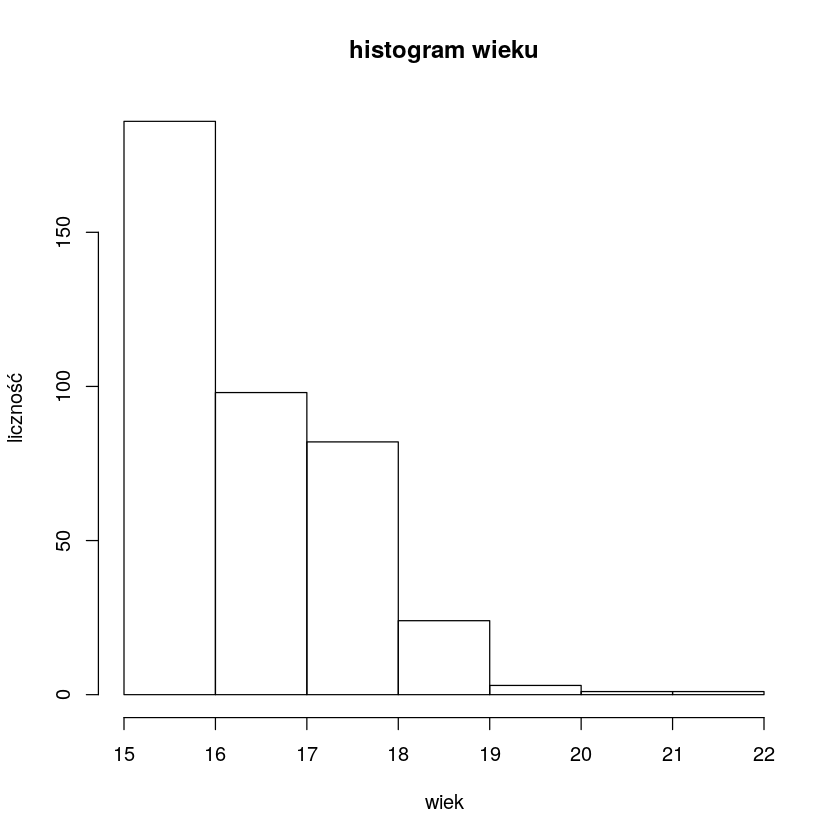

In [50]:
hist(t(data['age']), breaks=5,xlab="wiek", ylab="liczność", main="histogram wieku")

Patrząc na histogram widzimy, że rozkład ma asymetrię prawoskośną. Spróbujemy teraz policzyć współcznik asymetrii i zwerfikujemy naszą obserwację z wykresu.


In [6]:
central_moment= function (vector, rank)
{
    mean((vector-mean(vector))^rank)
}
std=function(vector)
{
    sqrt(sum((vector-mean(vector))^2)/(length(vector)))
}
skewness =function (vector)
{
    central_moment(vector,3)/(std(vector)^3)
}
round(skewness(age),3)

[1] 0.464

Widzimy, że współczynnik skośności jest  wyraźnie dodatni co zgadza się z naszymi spostrzerzeniamia na temat wykresu.

# Czas nauki

Czas nauki w ankiecie został określony przez dodatnią liczbę całkowitą, określającą ilość spędzonego czasu na naukę w tygodniu.

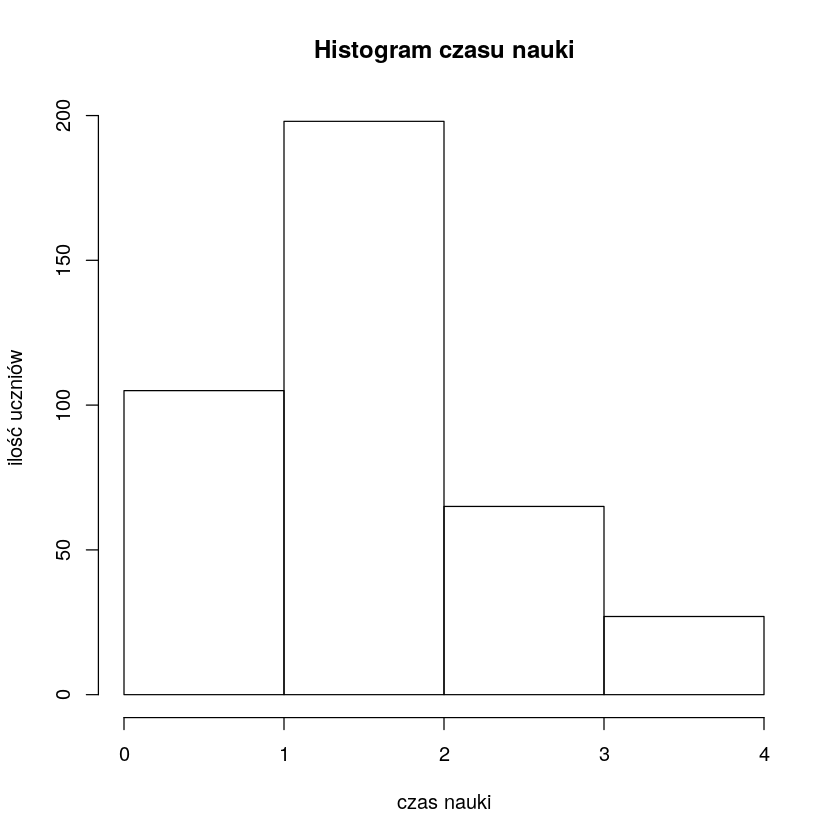

In [7]:
studytime<-t(data['studytime'])
hist(studytime, breaks=0:4, xlab="czas nauki", ylab="ilość uczniów", main="Histogram czasu nauki")

Histogram czasu nauki został narysowany powyżej. Widzimy na nim mocną koncetrację wyników na poziomie 2 godzin. Potwierdzić to może bliskość mediany i średniej. Wykres ten jest jednomodalny. Poniżej pokażemy wartości statystyk opisowych z użyciem funkcji $summary$. Skośność możemy określić jako prawostronną.

In [8]:
summary(as.vector(studytime))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   2.035   2.000   4.000 

Korzystając powyżej z funkcji $summary$ widzimy, że faktycznie mediana i średnia są sobie bliskie.

# Zawody rodziców



Przeanalizujemy zawody rodzciów uczniów biorących udział w ankiecie. 

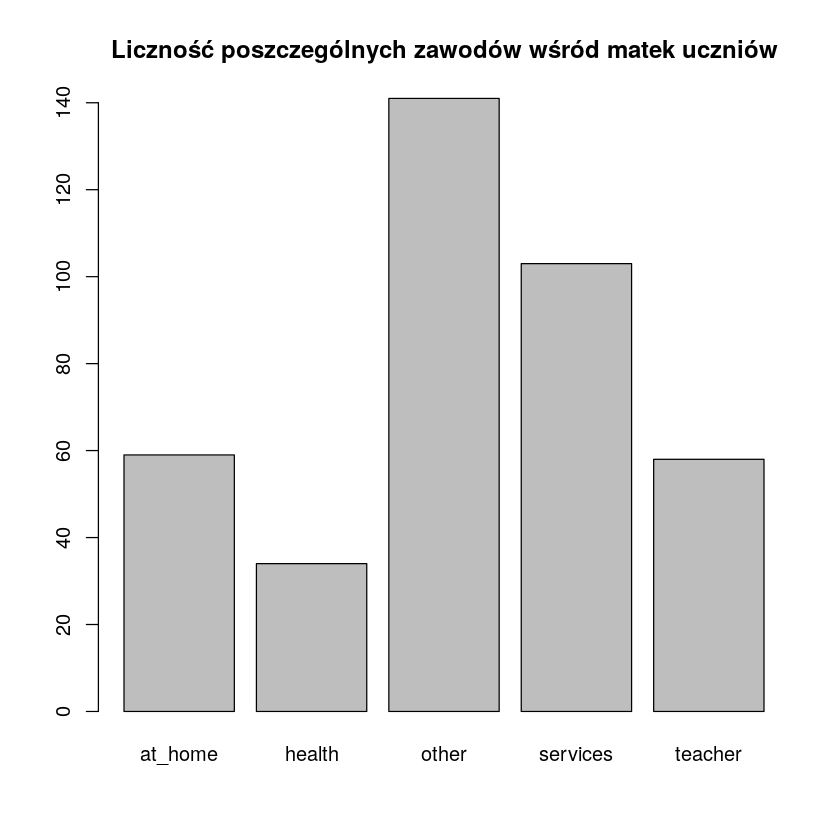

In [9]:
plot_mjob<-plot(data['mjob'], main="Liczność poszczególnych zawodów wśród matek uczniów")

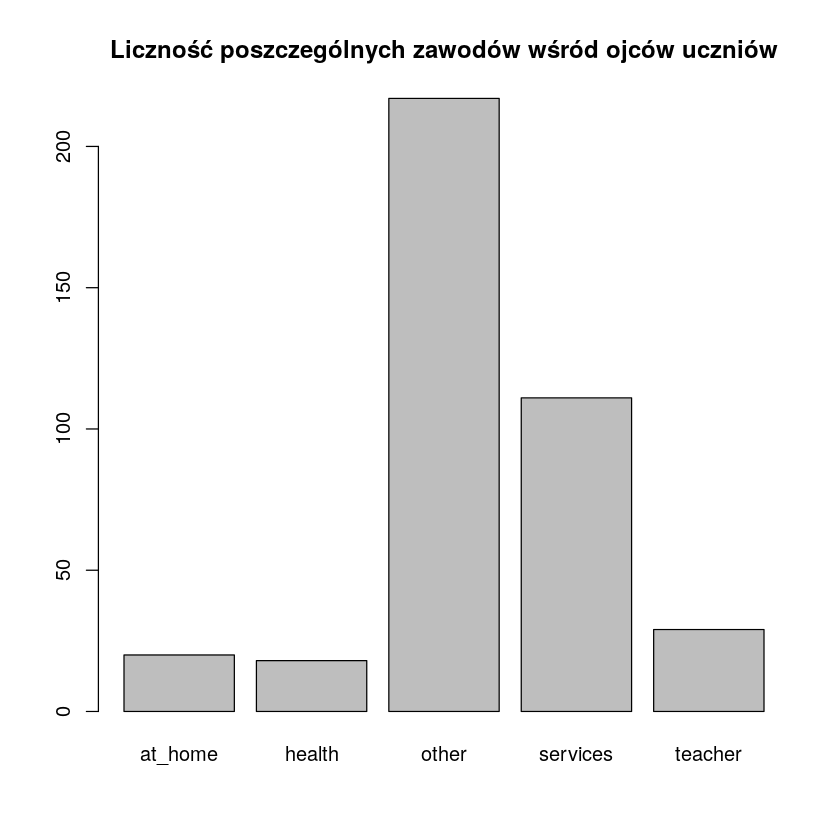

In [10]:
plot_fjob<-plot(data['fjob'], main="Liczność poszczególnych zawodów wśród ojców uczniów")


Na obu wykresach widzimy, że najczęściej udzielaną odpowiedzią była opcja "other". Jest to dosyć ogólna odpowiedź i ciężko na jej podstawie wyciągnąć miarodajne wnioski.


# Powód wybrania szkoły

Analizę powodu wybrania naszej szkoły podzielimy ze względu na kilka kategorii. Przedstawimy dane w postaci liczbowej jak i zaprezentujemy je na wykresie.

## Podział ze względu na płeć

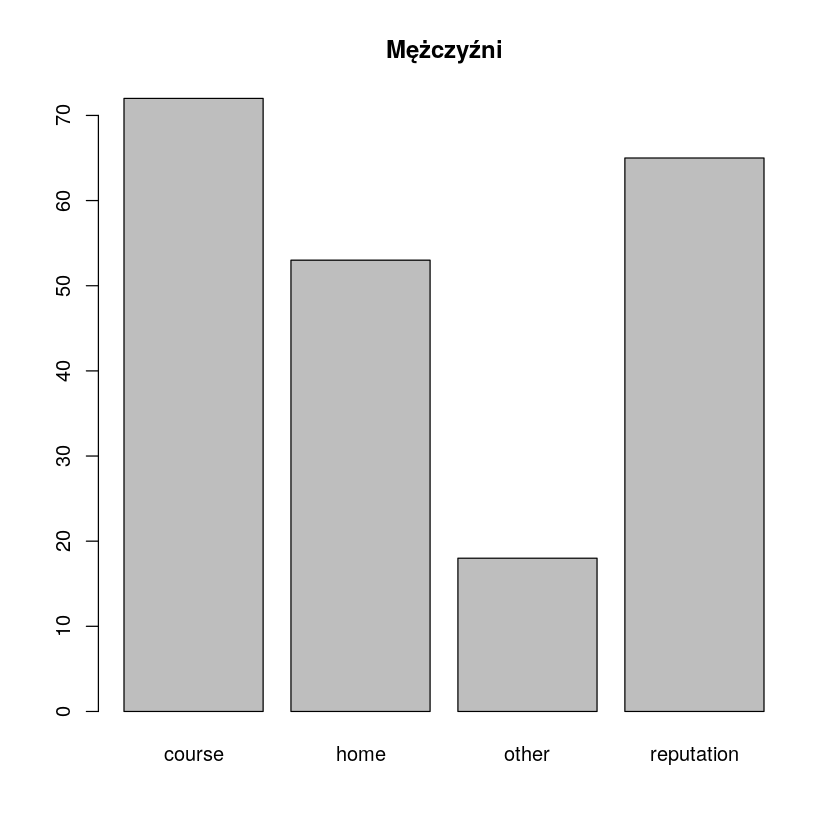

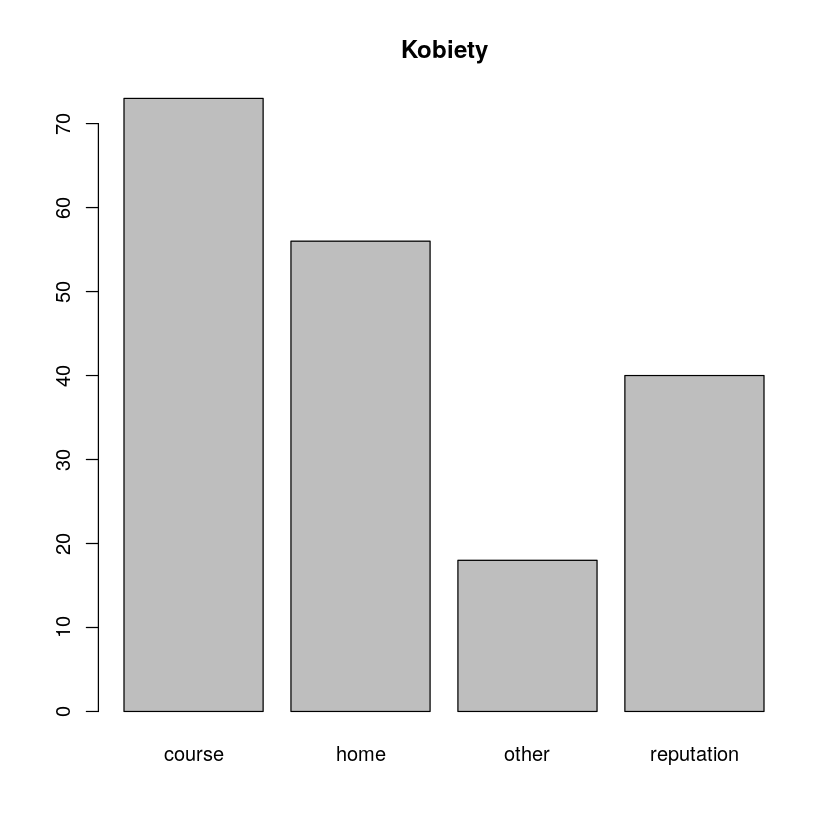

In [11]:
sex_M_data<- data[data$sex=="M",]
sex_F_data<- data[data$sex=="F",]
plot(sex_F_data["reason"],main="Mężczyźni")
plot(sex_M_data["reason"], main="Kobiety")

In [12]:
table(sex_M_data["reason"],dnn="Male" )
table(sex_F_data["reason"], dnn="Female")

Male
    course       home      other reputation 
        73         56         18         40 

Female
    course       home      other reputation 
        72         53         18         65 

Widzimy, że rozkład wyników jest zbliżony do siebie. Widać różnicę w kategorii "reputation", gdzie większy wynik jest wśród kobiet.

## Podział ze względu na miejsce zamieszkania

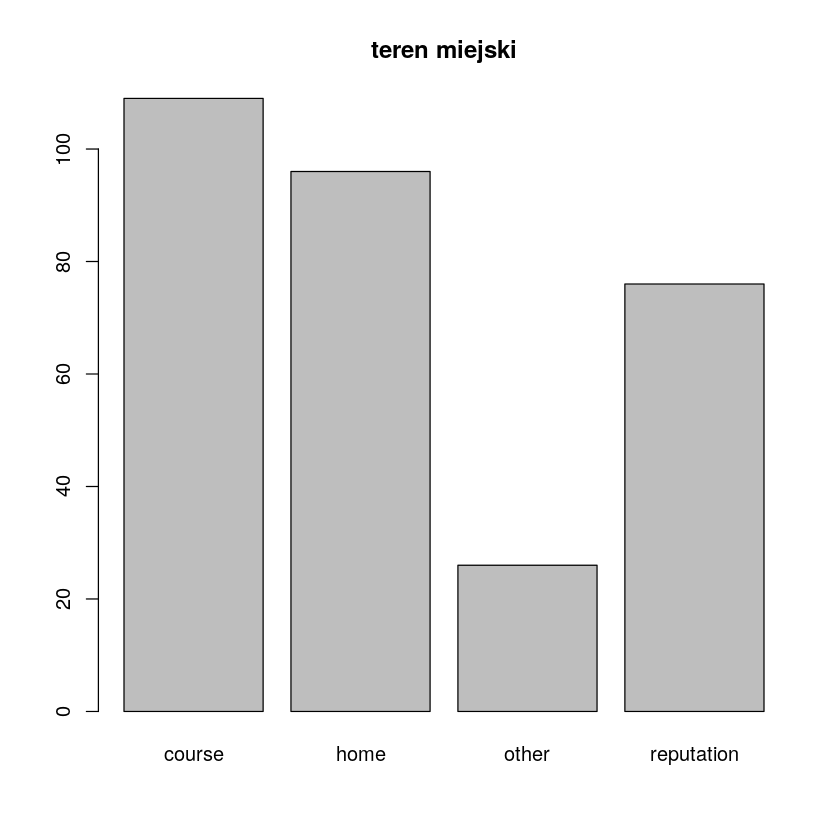

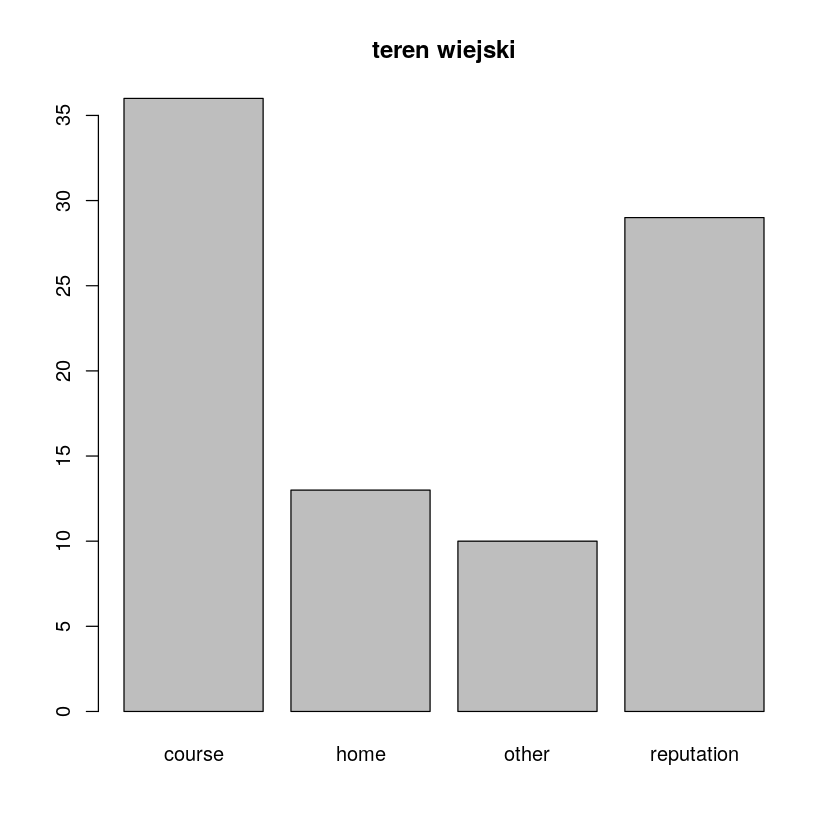

In [13]:
address_U_data<- data[data$address=="U",]
address_R_data<- data[data$address=="R",]
plot(address_U_data["reason"], main="teren miejski")
plot(address_R_data["reason"], main="teren wiejski")

Widzimy tutaj znaczną różnicę w kategorii "home". Może na to wpływać, fakt iż szkoła jest położona w mieście. Powoduje to, że prawdopodobnie uczniowie pochodzący z rejonów wiejskich mają mają dalszą drogę do szkoły niż osoby które miejszkają na teranach miejskich.


# Czas podróży do szkoły

Przeanalizujemy czas podróży uczniów do szkoły. Narysujemy w tym celu histogram.

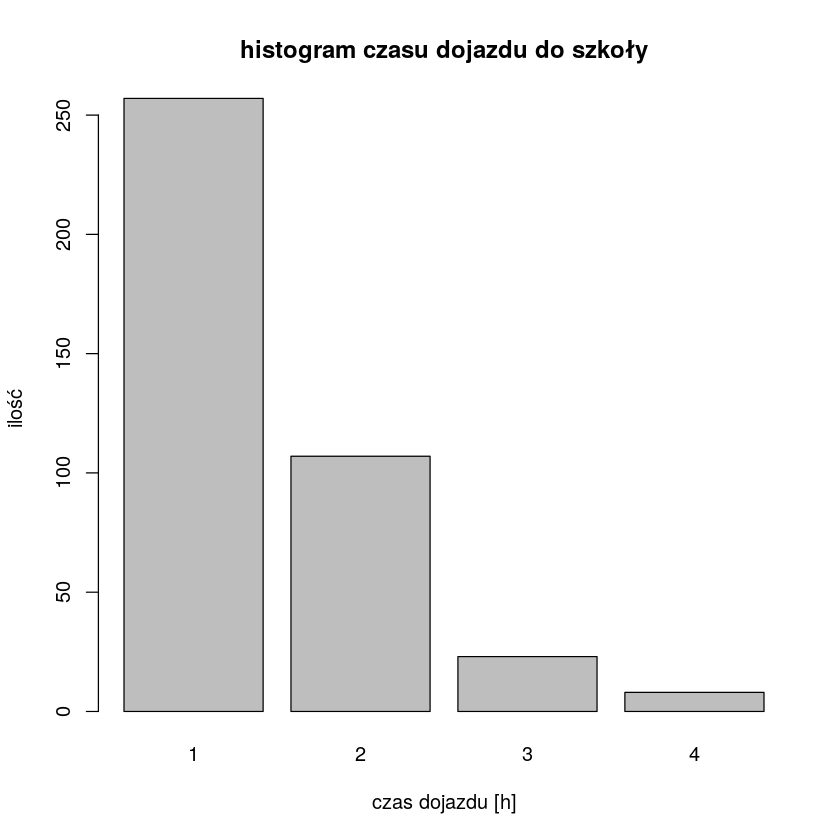

In [49]:
barplot(table(t(data["traveltime"])), ylab="ilość", xlab="czas dojazdu [h]", main="histogram czasu dojazdu do szkoły")

Widzimy, że rozkład jest bardzo mocno prawoskośny. Wykres jest też jednomodalny. Spojrzymy teraz, jak na rozkład wpływa podział uczniów ze względu na miejsce zamieszkania.


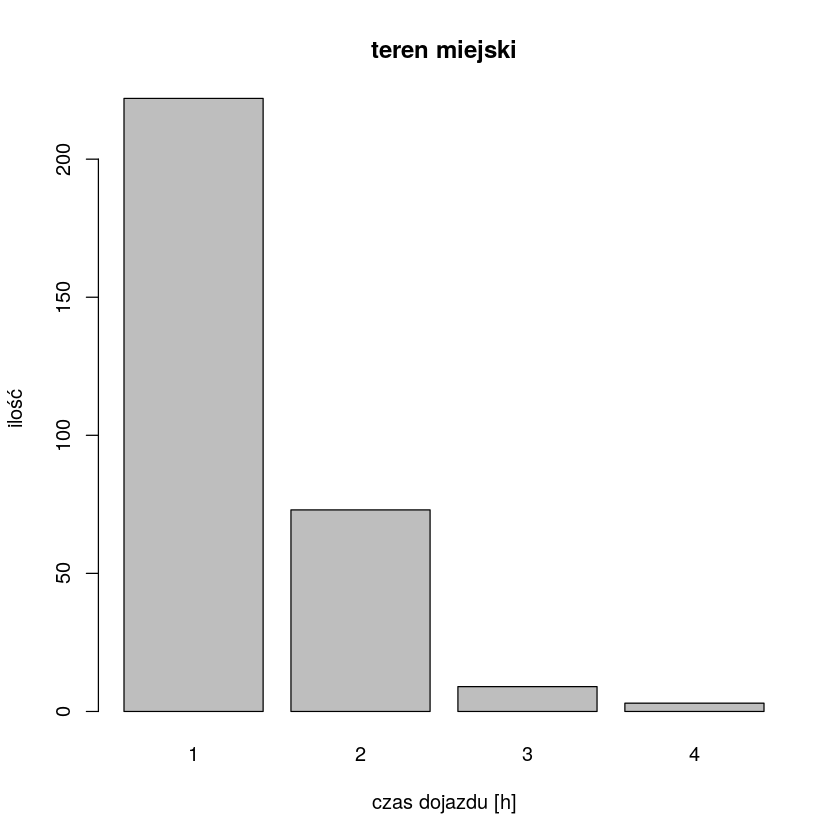

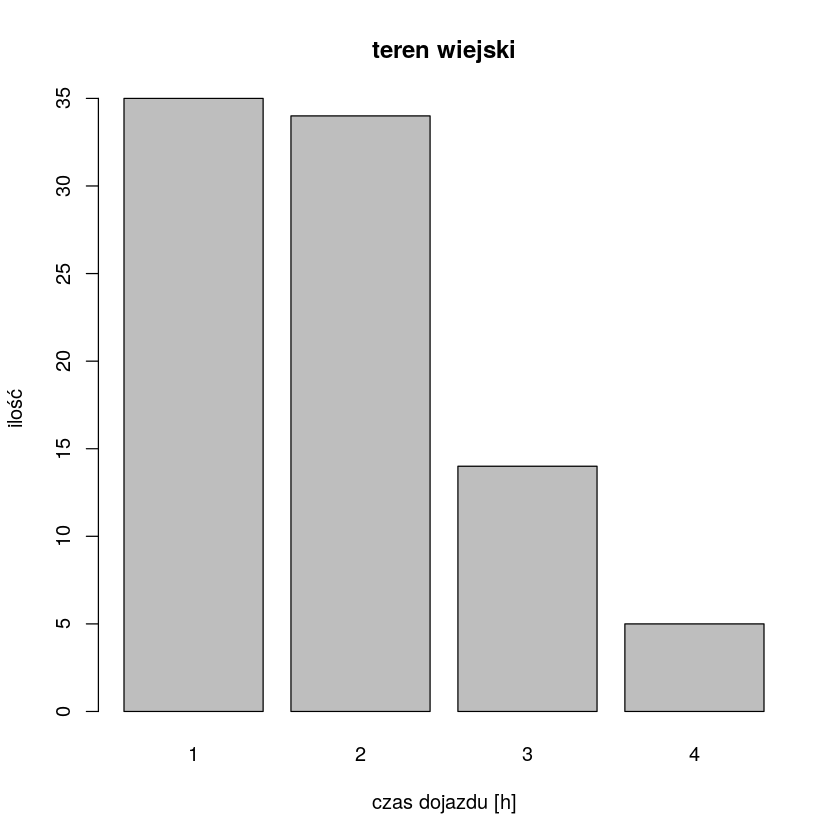

In [15]:
barplot(table(t(address_U_data["traveltime"])), main="teren miejski", ylab="ilość", xlab="czas dojazdu [h]")
barplot(table(t(address_R_data["traveltime"])), main="teren wiejski",ylab="ilość", xlab="czas dojazdu [h]")

Widzimy, że uczniowie mieszkający na teranach wiejskich dojeżdżają dłużej od uczniów mieszkających na teranach miejskich. Spojrzymy jeszcze na średnią arytmetyczną wyników.

In [16]:
summary(address_U_data["traveltime"])[4]
summary(address_R_data["traveltime"])[4]

[1] "Mean   :1.326  "

[1] "Mean   :1.875  "

# Niepowodzenia przy przechodzeniu do następnej klasy



Liczba niepowodzeń przy przechodzeniu do następnej klasy znajduję się w kolumnie $failures$. Dane w niej zawarte są całkowitoliczbowe i określają liczbę niepowodzeń przy przechodzeniu do następnej klasy. Poniżej przedstawimy dane zawarte w kolumnie w postaci tabeli, zliczającej poszczególne wyniki.

In [17]:
table(t(data['failures']))


  0   1   2   3 
312  50  17  16 

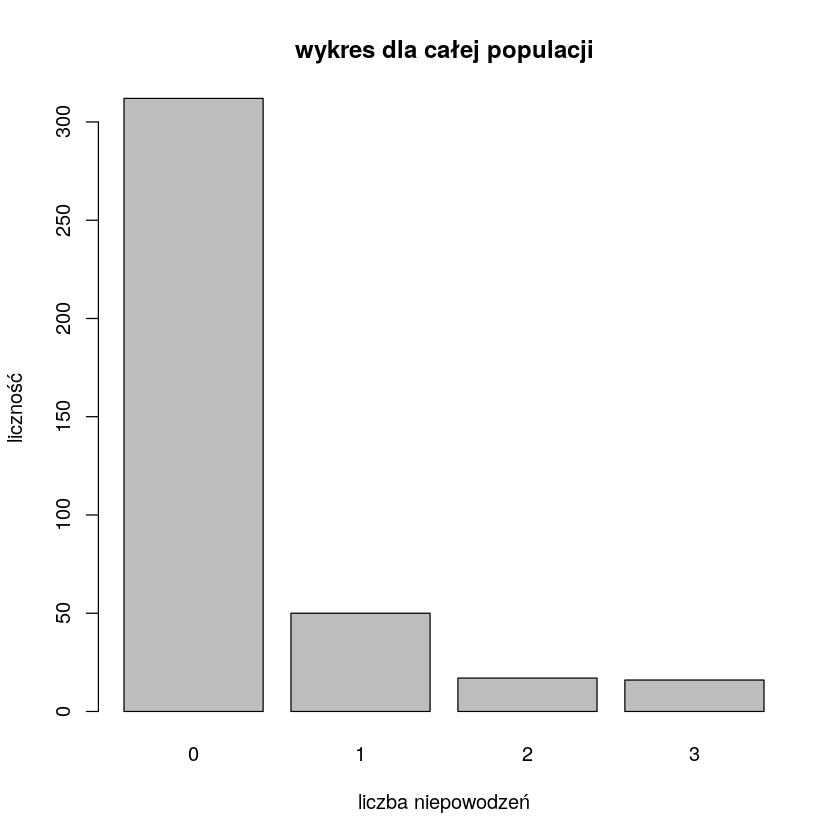

In [18]:
barplot(table(t(data['failures'])),main="wykres dla całej populacji", xlab="liczba niepowodzeń", ylab="liczność")

Teraz spojrzymy na te dane, patrząc z perspektywy czasu nauki. Narysujemy dwa wykresy, jeden dla grupy uczniów spędzających do 2 godzin na nauce ( jest to mediana) oraz pozostałej grupy uczniów.


In [19]:
short_studytime_data<- data[data$studytime<=2,]
long_studytime_data<- data[data$studytime>2,]
len_short_studytime_data<-sum(table(t(short_studytime_data['failures'])))
len_long_studytime_data<-sum(table(t(long_studytime_data['failures'])))

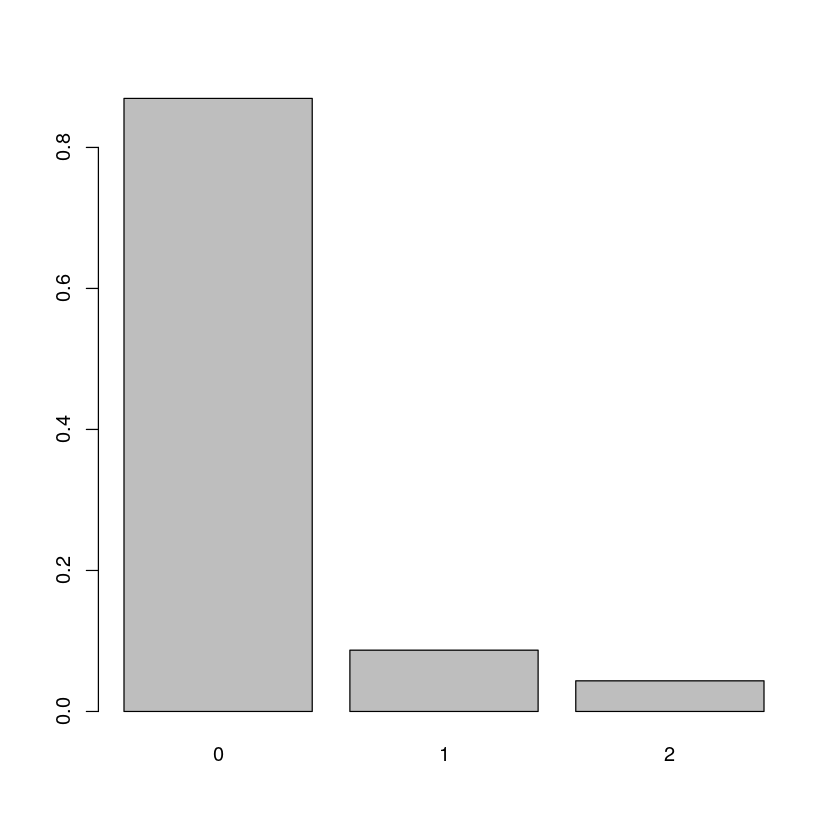

In [20]:
barplot(table(t(long_studytime_data['failures']))/len_long_studytime_data)


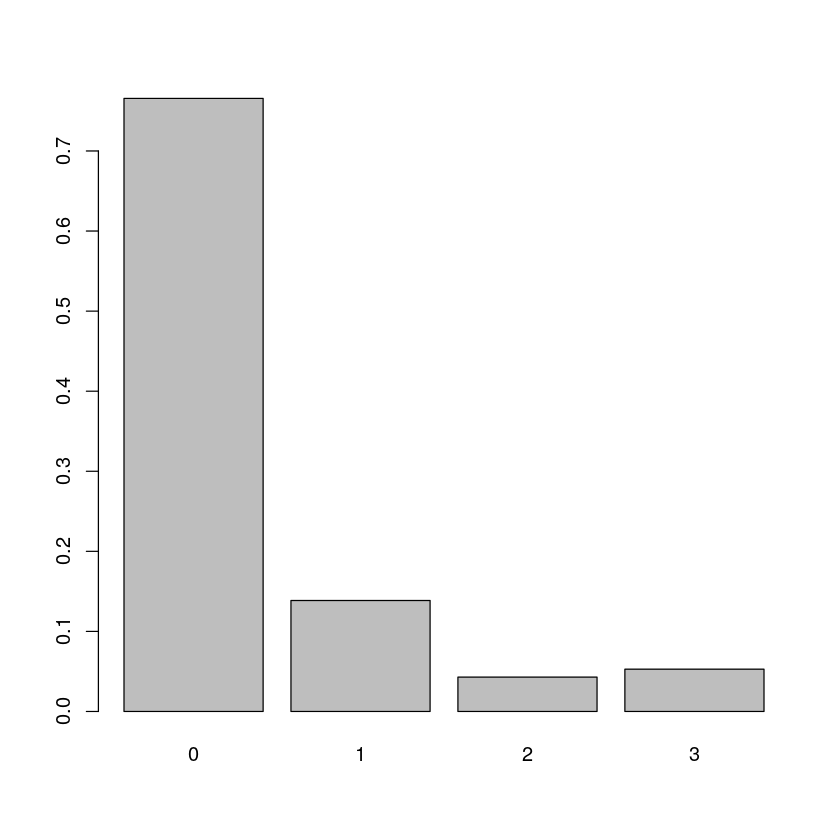

In [21]:
barplot(table(t(short_studytime_data['failures']))/len_short_studytime_data)

Widzimy, że różnice jak nie są znaczące. Wartości  na histogramie zostały zrzutowane do przedziału $[0;1]$ aby zachować proporcję.


# Analiza spożywania alkoholu

## Korelacja spożycia w tygodniu oraz weekend

Sprawdzimy w jakiej korelacji są wyniki na pytania dotyczącej ilości alkoholu spożywanego przez uczniów w dni powszednie oraz weekend. 


In [22]:
cor(data$dalc,data$walc)

[1] 0.6475442

Wartość korelacji wskazuje nam na umiarkowaną zależność pomiędzy ilością spożywanego alkoholu w weekend oraz w pozostałe dni.


Spojrzymy teraz na spożycia alkoholu ze względu na płęć ucznia. Narysujemy w tym celu dwa wykresy, jeden dla spożycia alkoholu w weekend a drugi dla spożycia w tygodniu.

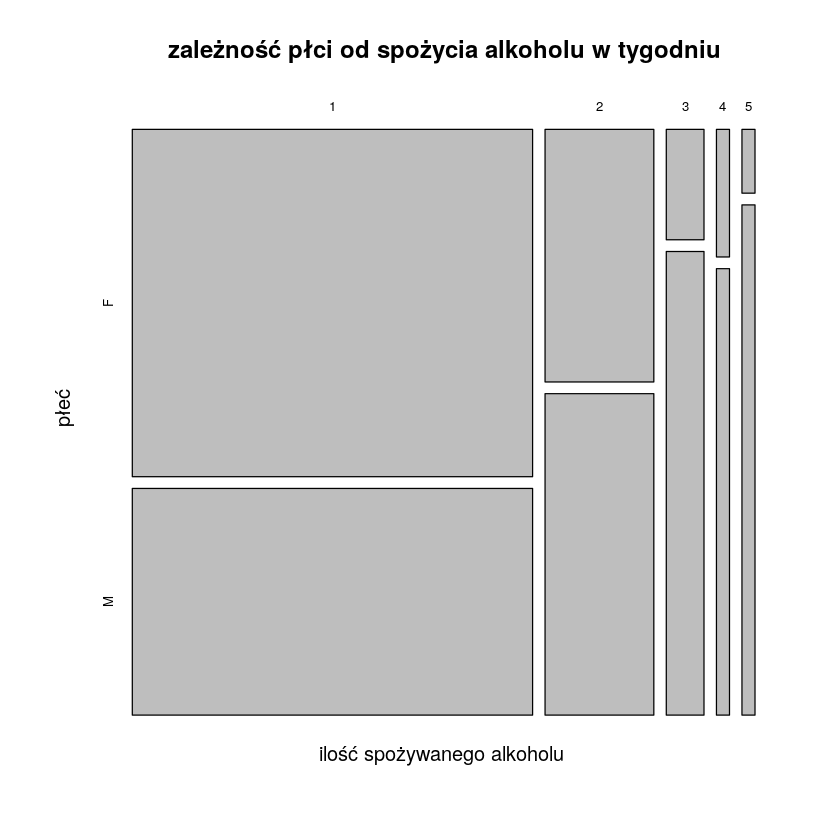

In [23]:
plot(table(data$dalc,data$sex), xlab="ilość spożywanego alkoholu ", ylab="płeć", 
     main="zależność płci od spożycia alkoholu w tygodniu")

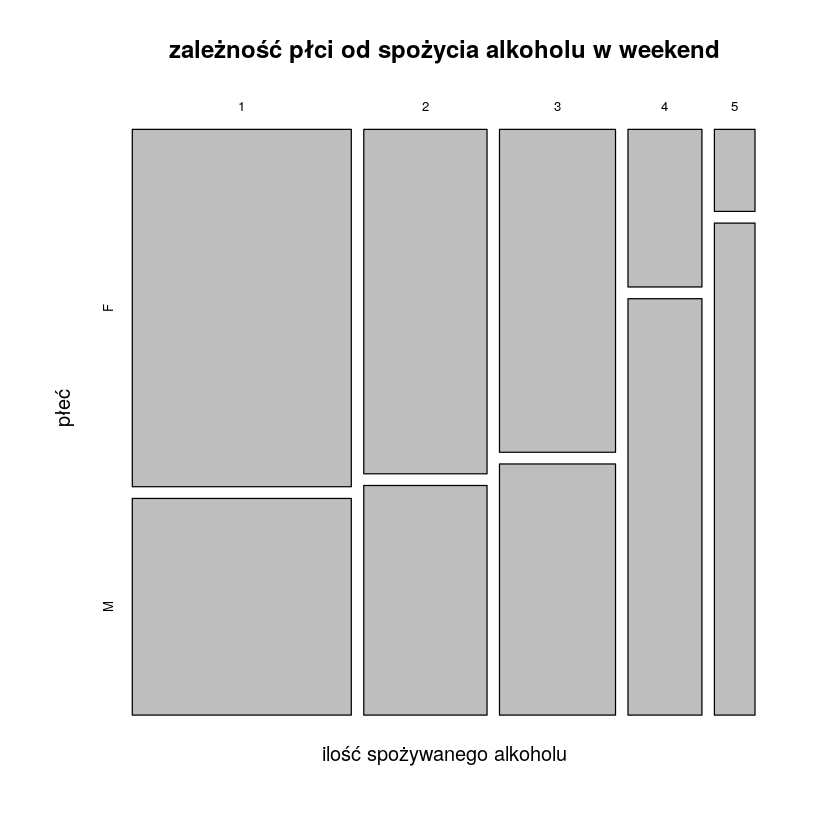

In [24]:
plot(table(data$walc,data$sex), xlab="ilość spożywanego alkoholu", ylab="płeć",
     main="zależność płci od spożycia alkoholu w weekend")

Możemy zauważyć, że w obu przypadkach wraz ze wzrostem ilości spożycia alkoholu maleje liczba kobiet a rośnie liczba mężczyzn.


# Analiza ocen uczniów


Spojrzymy teraz na oceny uczniów. W naszych danych mamy zebrane oceny po 2 okresach nauki oraz ocenę końcową. Policzymy współczynnik korelacji dla tych 3 kolumn.

In [25]:
cor(data$g1, data$g2)
cor(data$g1, data$g3)
cor(data$g2, data$g3)

[1] 0.8521181

[1] 0.8014679

[1] 0.904868

Współczynniki korelacji są bardzo wysokie, przekraczają wartość $0.8$ a współczynnik korelacji pomiędzy oceną za 2 semestr i oceną końcową przekracza wartość $0.9$. Tak wysokie wartości współczynników wskazują na bardzo silną korelację pomiędzy ocenami w poszczególnych okresach nauki.

Dla dopełnienia analizy narysujemy wykresy zależności ocen w poszczególnych okresach.


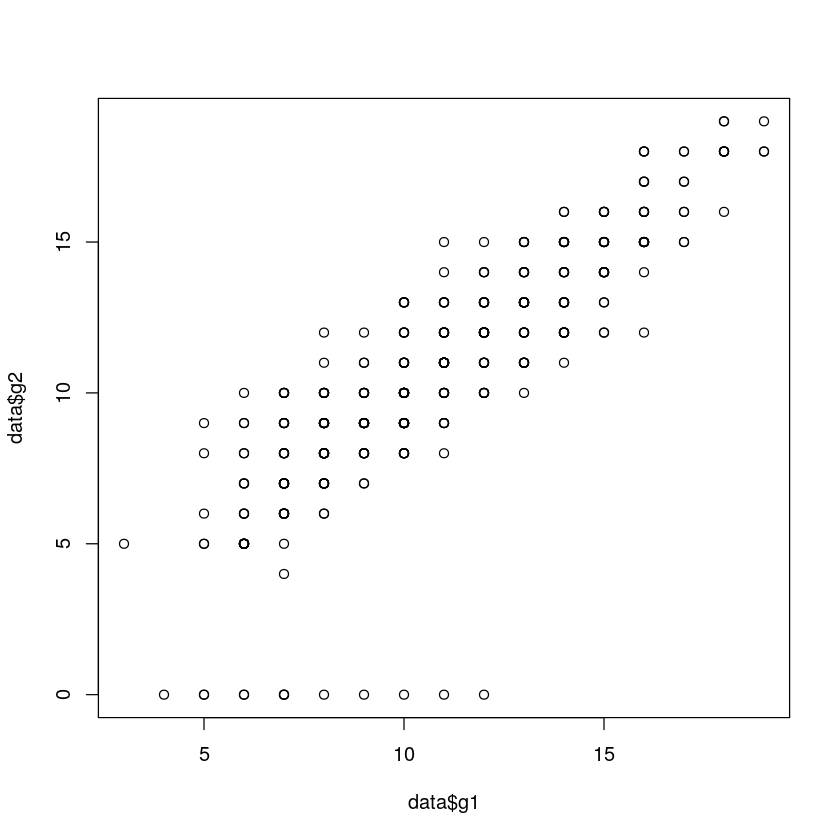

In [26]:
plot(data$g1, data$g2)

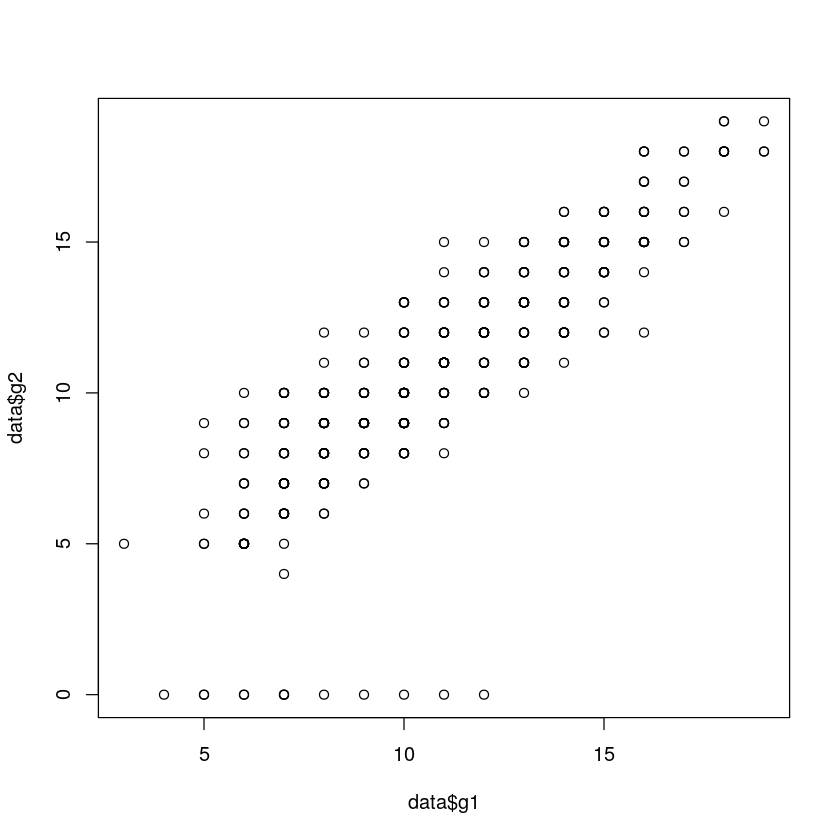

In [27]:
plot(data$g1, data$g2)

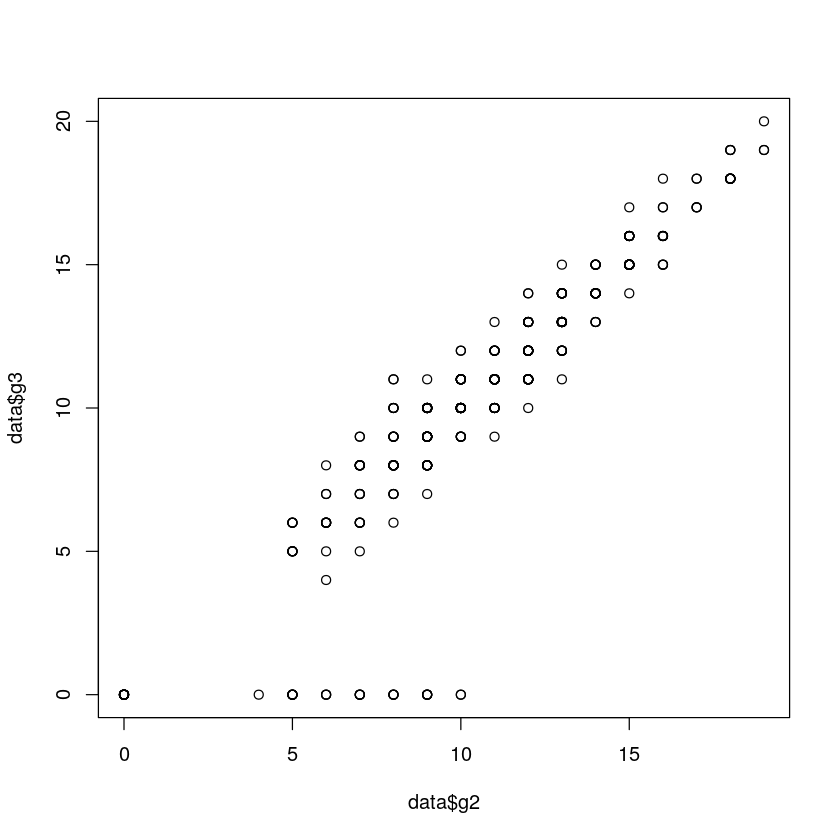

In [28]:
plot(data$g2, data$g3)

Na podstawie powyższych wykresów może zwerfikować powyższe obliczenia, zauważalna jest silna korelacja liniowa.

# Testowanie hipotez


## Test Z, nieznane odchylenie

Spróbujemy przeprowadzić badanie hipotezy przy pomocy testu Z i nie znanym odchyleniem standardowym populacji. Wylosujemy do tego grupę 30 studentów i sprawdzimy czy ich średnia wieku jest równa średniej wieku z całej naszej populacji. Użyjemy do tego testu dwustronnego. Za poziom istotności przyjmiemy $\alpha=0.05$ Układ hipotez wygląda następująco:

H0: m=$\mu$
H1: m$\neq$ $\mu$

Gdzie przez $m$ oznaczyliśmy średnią z wylosowanej próby, a przez $\mu$ średnią z populacji. Wartość statysyki $Z$ wyliczymy ze wzoru $Z=\frac{m-\mu}{S}\cdot \sqrt n$ Przejdźmy do obliczeń.

In [29]:
sample_data<- data[sample(nrow(data),30),]
head(sample_data)
alfa<- 0.05

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,⋯,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
219,GP,F,17,U,GT3,T,2,3,at_home,other,⋯,3,3,3,1,4,3,3,7,7,8
137,GP,M,17,R,GT3,T,3,4,at_home,other,⋯,5,4,5,2,4,5,0,10,0,0
157,GP,M,17,R,LE3,T,1,2,other,other,⋯,2,2,2,3,3,5,8,16,12,13
203,GP,F,17,U,GT3,T,1,1,other,other,⋯,4,4,4,1,3,1,4,9,9,10
87,GP,F,16,U,LE3,T,2,2,at_home,other,⋯,4,3,4,1,2,2,4,8,7,6
198,GP,M,16,R,LE3,T,3,3,teacher,other,⋯,3,3,4,3,5,3,8,9,9,10


In [30]:
sample_data<-data[sample(nrow(data),30),]
sample_mean<-mean(t(sample_data['age']))
sample_mean
nrow(sample_data)

[1] 16.63333

[1] 30

In [31]:
population_mean<-mean(t(data['age']))
population_mean


[1] 16.6962

In [32]:
sample_std<-std(t(sample_data['age']))
sample_std

[1] 1.196755

Wyznaczamy wartość statystyki testowej $Z$

In [33]:
Z<- (sample_mean-population_mean)/sample_std*sqrt(nrow(sample_data))
Z

[1] -0.2877354

Wyznaczamy przedział krytyczny


In [34]:
r_end<-qnorm(alfa/2)
r_end
l_end<-qnorm(1-alfa/2)
l_end

[1] -1.959964

[1] 1.959964

Zbiór krytyczny ma postać: $(-\infty;r_{end}) \cup (l_{end}; \infty)$

In [35]:
r_end> Z || Z> l_end


[1] FALSE

Widzimy, że wartość statystyki $Z$ nie znajduje się w zbiorze krytycznym. Nie mamy więc podstaw do odrzucenia hipotezy $H_{0}$.

# Test dla proporcji


Przeprowadzimy test dla proporcji osób będącach w związku romantycznym do osób nie będących w takim związku. Nasze dane, potraktujemy jaką pewną próbę i porównamy ją z wynikami dla całej populacji uzyskanymi ze [źródła]
(https://www.pewresearch.org/internet/2015/10/01/teens-technology-and-romantic-relationships/).

Obliczymy wartość statystyki $Z$ na podstawie wzoru $Z=\frac{p-p_{0}}{\sqrt \frac{p_{0}(1-p_{0})}{n}}$. Tak wyliczona statystyka ma rozkład normlany. Sprawdzimy czy na podstawie naszej próby będziemy mogli prawidłowo wnioskować o całej populacji. Za poziom istotności testu przyjmiemy $\alpha=0.05$.


In [36]:
n<-nrow(data)
n
p<-nrow(data[data$romantic=='true',])/n
p


[1] 395

[1] 0.3341772

Z wyżej podanego źródła odczytujemy $p_{0}=0.18$

In [37]:
p_0<-0.18


Stawiamy takie hipotezy:

$H_{0}$ : $p=p_{0}$, $H_{1}$: $p\neq p_{0}$ 

Obliczamy teraz wartość statystyki $Z$

In [38]:
Z<-(p-p_0)/sqrt((p_0*(1-p_0))/n)
Z

[1] 7.975824

In [39]:
r_end<-qnorm(alfa/2)
r_end
l_end<-qnorm(1-alfa/2)
l_end

[1] -1.959964

[1] 1.959964

Zbiór krytyczny ma postać: $(-\infty;r_{end}) \cup (l_{end}; \infty)$


In [40]:
r_end> Z || Z> l_end

[1] TRUE

Widzimy, że wartość statystyki testowej leży w zbiorze krytycznym co jest dla nas podstawę do odrzucenia hipotezy zerowej i skłonieniu się do stwierdzenia, że na podstawie naszej próby nie możemy poprawnie wnioskować na temat liczby relacji romantycznych w całej populacji.

# Test Chi-kwadrat

Sprawdzimy, czy preferencję wybory szkoły zależy od płci ucznia. Wykorzystamy do tego test dla dwóch populacji i statystykę $\chi ^2$. Za poziom istotności przyjmiemy $\alpha=0.01$. Przypomnijmy odpowiednie dane które wykorzystamy.


In [41]:
table(sex_M_data["reason"],dnn="Male" )
table(sex_F_data["reason"], dnn="Female")
alpha<-0.01

Male
    course       home      other reputation 
        73         56         18         40 

Female
    course       home      other reputation 
        72         53         18         65 

Układ hipotez wygląda następująco:

$H_{0}$: Brak zależności między płcią a powodami wybrania szkoły

$H_{1}$: istnieje zależność między płcią a powodami wybrania szkoły

In [42]:
tmp_m_data<-as.vector(t(table(sex_M_data["reason"],dnn="Male" )))
tmp_f_data<-as.vector(t(table(sex_F_data["reason"], dnn="Female")))
tmp_data<-t(matrix(c(tmp_m_data, tmp_f_data),4,2))

In [43]:
margin_rows<-margin.table(tmp_data,1)
margin_cols<- margin.table(tmp_data,2)
total<-sum(margin_rows)
total
margin_rows
margin_cols

[1] 395

[1] 187 208

[1] 145 109  36 105

In [44]:
df <- (length(margin_rows)-1)*(length(margin_cols)-1)
df

[1] 3

In [45]:
E = outer(margin_rows, margin_cols)/ total 
E

68.64557,51.60253,17.04304,49.70886
76.35443,57.39747,18.95696,55.29114


In [46]:
chi2_temp <- (tmp_data - E)^2/E
chi2 <- sum(chi2_temp)
chi2

[1] 4.939352

In [47]:
cr_value<-qchisq(1 - alpha, df)
cr_value

[1] 11.34487

In [48]:
chi2<cr_value

[1] TRUE

Wartość naszej statystyki nie znajduje się w obszarze krytycznym, nie mamy więc podstaw do odrzucenia hipotezy $H_{0}$.

# Podsumowanie

* Dane wybrane przez autora zawierały bardzo dużo informacji, grupa uczniów oraz liczba pytań była stosunkowo dużo. Znajdowały się w niej pytanie na które uczniowie odpowiadali w sposób binarny (Tak/Nie) lub też wybierając jedną z przewidzianych odpowiedzi. W zbiorze danych zabrakło danych typu ciągłego, co ograniczyło w pewien sposób możliwość pokazania wszystkich narzędzi analizy danych
* Podczas procesu analizy danych został wykorzystany pewien podstawowy zbiór narzędzi statystycznych. Korzystaliśmy z funkcji $summary$ która zwraca podstawowe statystyki opisowe zbioru danych. Obliczaliśmy odchylenie standardowe, współczynnik asymetrii oraz momenty centralne zbioru danych. Wykorzystywaliśmy również współczynnik korelacji do określenie korelacji liniowej dwóch zestawów danych.
* Pośród wykresów które zostały narysowane największą cześć stanowią histogramy. Taki stan rzeczy jest spowodowany dyskretną nautrą danych jakie zawiera nasza baza.
* Podczas analizy została wylosowana pewna próbka uczniów i został przeprowadzony test statystyczny w odniesieniu do bazy danych jako populacji. Przeprowadziliśmy również test, traktujący nasze dane jako pewną próbkę, a za populację przyjeliśmy całą populacji posiłkując się zewnętrznymi danymi.
* Do testowania hipotez użyliśmy testu dla średniej, testu dla proporcji oraz testu zależności dwóch relacji przy pomocy testu $\chi^2$. 
